In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import io
df2 = pd.read_csv('household_power_consumption.txt', sep=';', parse_dates={'DATE' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, index_col='DATE')

In [3]:
df2.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DATE,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
df2.isnull().sum()

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [5]:
df2.replace('?', 'nan', inplace=True)
df2 = df2.astype('float32')

In [6]:
df2 = df2.fillna(df2.mean())

In [7]:
data_res = df2.resample('D').sum()
print(data_res.head())

            Global_active_power  Global_reactive_power       Voltage  \
DATE                                                                   
2006-12-16          1209.176025              34.922001   93552.53125   
2006-12-17          3390.459961             226.005997  345725.31250   
2006-12-18          2203.825928             161.792007  347373.62500   
2006-12-19          1666.193970             150.942001  348479.00000   
2006-12-20          2225.748047             160.998001  348923.62500   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
DATE                                                                          
2006-12-16       5180.799805             0.0           546.0          4926.0  
2006-12-17      14398.599609          2033.0          4187.0         13341.0  
2006-12-18       9247.200195          1063.0          2621.0         14018.0  
2006-12-19       7094.000000           839.0          7602.0          6197.0  
2006-12-20       9313

In [8]:
df2.describe(include='all')

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.091615e+00,1.237143e-01,2.408717e+02,4.627778e+00,1.121923e+00,1.298519e+00,6.458445e+00
std,1.050655e+00,1.120142e-01,3.232019e+00,4.416490e+00,6.114397e+00,5.785470e+00,8.384177e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.100000e-01,4.800000e-02,2.390200e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.300000e-01,1.020000e-01,2.410500e+02,2.800000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.520000e+00,1.920000e-01,2.429700e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [17]:
import scipy
import scipy.stats
from scipy.stats import pearsonr
corr,_ = pearsonr(df2.Global_active_power,df2.Global_reactive_power)
corr

0.2470170525119239

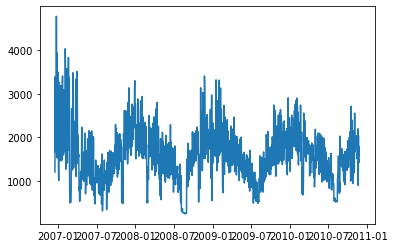

In [9]:
plt.plot(data_res.index,data_res.Global_active_power)

In [11]:
data_res.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.041098,0.062393,0.999182,0.545338,0.481370,0.732613
Global_reactive_power,0.041098,1.000000,0.050946,0.062937,0.319394,0.182199,0.035568
Voltage,0.062393,0.050946,1.000000,0.052214,-0.003525,-0.013305,0.095189
Global_intensity,0.999182,0.062937,0.052214,1.000000,0.557975,0.490773,0.724145
Sub_metering_1,0.545338,0.319394,-0.003525,0.557975,1.000000,0.251585,0.308917
Sub_metering_2,0.481370,0.182199,-0.013305,0.490773,0.251585,1.000000,0.198360
Sub_metering_3,0.732613,0.035568,0.095189,0.724145,0.308917,0.198360,1.000000


In [16]:
corr,_ = pearsonr(df2.Voltage,df2.Global_intensity)
corr

-0.4097846327279185

In [18]:
data_res.reset_index(inplace=True)


x_test = data_res.tail(365)
x_train =data_res[:-365]

data_res.dtypes

DATE                     datetime64[ns]
Global_active_power             float32
Global_reactive_power           float32
Voltage                         float32
Global_intensity                float32
Sub_metering_1                  float32
Sub_metering_2                  float32
Sub_metering_3                  float32
dtype: object

In [21]:
df_uni = data_res[['DATE','Global_active_power']]

# making a new dataframe from df_daily2 but renaming the columns
new_df = df_uni.rename(columns={"DATE": "ds", "Global_active_power": "y"})

In [ ]:
from fbprophet import Prophet
x_test_uni = new_df.tail(365)
x_train_uni = new_df[:-365]

In [ ]:
model = Prophet()
model.fit(x_train_uni)

future = model.make_future_dataframe(periods=365 , freq= 'D' )
result_uni = model.predict(future)

result_uni.shape

In [ ]:
result_uni.head()

In [ ]:
model.plot(result_uni)
plt.show()

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [ ]:
# MAPE
mean_absolute_percentage_error(x_test_uni['y'], result_uni['yhat'][-365:])

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(x_test_uni['y'], result_uni['yhat'][-365:]))
print(rmse)

In [ ]:
# statsmodels is a Python module for statistical models,conducting statistical tests and statistical data exploration.
import statsmodels.api as sm

from pylab import rcParams
#pylab is a module within the matplotlib library that was built to mimic MATLAB’s global style , All module objects starting with “rc” are a means to interact with your plot styles and settings

rcParams['figure.figsize']= 15,8

In [ ]:
plt.plot(result_uni['ds'],result_uni['yearly'])
plt.show()

In [ ]:
model.plot_components(result_uni)

In [ ]:
new_df = data_res.copy()



# making a new dataframe from df_daily2 but renaming the columns
new_df_mul= new_df.rename(columns={"DATE": "ds", "Global_active_power": "y","Global_reactive_power": "add1","Voltage": "add2","Global_intensity": "add3","Sub_metering_1": "add4","Sub_metering_2": "add5","Sub_metering_3": "add6"})

In [ ]:
x_test_multi = new_df_mul.tail(365)
x_train_multi = new_df_mul[:-365]

print(x_train_multi)

In [ ]:
#Adding regressors
# regressor = ['add1','add2','add3','add4','add5','add6]
model_multi = Prophet()
model_multi.add_regressor('add1')
model_multi.add_regressor('add2')
model_multi.add_regressor('add3')
model_multi.add_regressor('add4')
model_multi.add_regressor('add5')
model_multi.add_regressor('add6')

In [ ]:
model_multi.fit(x_train_multi)

In [ ]:
future_multi = model_multi.make_future_dataframe(periods=365,freq='D')
future_multi['add1'] = new_df_mul['add1'].values
future_multi['add2'] = new_df_mul['add2'].values
future_multi['add3'] = new_df_mul['add3'].values
future_multi['add4'] = new_df_mul['add4'].values
future_multi['add5'] = new_df_mul['add5'].values
future_multi['add6'] = new_df_mul['add6'].values
result_multi= model_multi.predict(future_multi)

In [ ]:
future_multi.shape

In [ ]:
model_multi.plot(result_multi)
plt.show()

In [ ]:
# MAPE
mean_absolute_percentage_error( x_test_multi['y'][-365:], result_multi['yhat'][-365:])

In [ ]:
rmse_multi = sqrt(mean_squared_error( x_test_multi['y'][-365:], result_multi['yhat'][-365:]))
print(rmse_multi)

In [ ]:
model_multi.plot_components(result_multi)